In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12    

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
train_X, test_X, train_y, test_y = train_test_split(diabetes.drop("Outcome", axis=1), diabetes.Outcome, test_size = 0.2, random_state = 100)

In [8]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(614, 8) (614,) (154, 8) (154,)


In [9]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]
# Learning rate
learning_rate = [0.01, 0.05, 0.1, 0.5]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 294, 389, 484, 578, 673, 768, 863, 957, 1052, 1147, 1242, 1336, 1431, 1526, 1621, 1715, 1810, 1905, 2000], 'learning_rate': [0.01, 0.05, 0.1, 0.5], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [11]:
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 20, cv = 2, verbose=1)

In [12]:
# Fit the random search model
gbm_random.fit(train_X, train_y)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   21.0s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [13]:
gbm_random.best_score_

0.7817589576547231

In [79]:
gbm_random.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=294,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
gbm_random.best_estimator_.feature_importances_

array([0.05074595, 0.41799277, 0.02082936, 0.02907047, 0.05984097,
       0.16057193, 0.09146435, 0.1694842 ])

In [14]:
pred_test_gbm = gbm_random.predict(test_X)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test_gbm))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       101
           1       0.67      0.53      0.59        53

    accuracy                           0.75       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 294, 389, 484, 578, 673, 768, 863, 957, 1052, 1147, 1242, 1336, 1431, 1526, 1621, 1715, 1810, 1905, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [17]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 2, 
                               verbose = 1, 
                               random_state =42, 
                               n_jobs = -1)

In [18]:
# Fit the random search model
rf_random.fit(train_X,train_y)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [19]:
rf_random.best_score_

0.7833876221498371

In [20]:
pred_test_rf = rf_random.predict(test_X)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test_rf))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       101
           1       0.61      0.51      0.56        53

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



## Let's build a XGBoost Model

In [53]:
from xgboost import XGBClassifier

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

random_grid = {'n_estimators': [500, 700, 1000, 1500],
              'learning_rate': [0.001, 0.005, 0.01, 0.05],
              'subsample': [0.3, 0.5, 0.7, 0.9],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.9],
              'min_child_weight': [1, 2, 3, 4],
              'gamma': [0, 0.25, 0.5, 1.0],
              'reg_alpha': [0.01, 0.05, 0.1, 0.5],
              'reg_lambda': [0.01, 0.05, 0.1, 0.5],
             }
print(random_grid)

{'n_estimators': [500, 700, 1000, 1500], 'learning_rate': [0.001, 0.005, 0.01, 0.05], 'subsample': [0.3, 0.5, 0.7, 0.9], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'colsample_bytree': [0.5, 0.6, 0.7, 0.9], 'min_child_weight': [1, 2, 3, 4], 'gamma': [0, 0.25, 0.5, 1.0], 'reg_alpha': [0.01, 0.05, 0.1, 0.5], 'reg_lambda': [0.01, 0.05, 0.1, 0.5]}


In [71]:
xgb = XGBClassifier(objective = 'binary:logistic')
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions= random_grid, 
                                n_jobs = -1, verbose = 1, n_iter = 1000, cv = 2)

In [72]:
xgb_random.fit(train_X, train_y, eval_set=[(test_X, test_y)])

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.8min


[0]	validation_0-error:0.266234
[1]	validation_0-error:0.266234
[2]	validation_0-error:0.318182
[3]	validation_0-error:0.305195
[4]	validation_0-error:0.285714
[5]	validation_0-error:0.318182
[6]	validation_0-error:0.305195
[7]	validation_0-error:0.298701
[8]	validation_0-error:0.292208
[9]	validation_0-error:0.285714
[10]	validation_0-error:0.285714
[11]	validation_0-error:0.305195
[12]	validation_0-error:0.292208
[13]	validation_0-error:0.285714
[14]	validation_0-error:0.279221
[15]	validation_0-error:0.279221
[16]	validation_0-error:0.298701
[17]	validation_0-error:0.305195
[18]	validation_0-error:0.305195
[19]	validation_0-error:0.292208
[20]	validation_0-error:0.298701
[21]	validation_0-error:0.305195
[22]	validation_0-error:0.305195
[23]	validation_0-error:0.298701
[24]	validation_0-error:0.292208
[25]	validation_0-error:0.298701
[26]	validation_0-error:0.305195
[27]	validation_0-error:0.305195
[28]	validation_0-error:0.298701
[29]	validation_0-error:0.292208
[30]	validation_0-er

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  7.7min finished


[83]	validation_0-error:0.285714
[84]	validation_0-error:0.285714
[85]	validation_0-error:0.285714
[86]	validation_0-error:0.285714
[87]	validation_0-error:0.285714
[88]	validation_0-error:0.285714
[89]	validation_0-error:0.285714
[90]	validation_0-error:0.285714
[91]	validation_0-error:0.285714
[92]	validation_0-error:0.279221
[93]	validation_0-error:0.285714
[94]	validation_0-error:0.285714
[95]	validation_0-error:0.285714
[96]	validation_0-error:0.285714
[97]	validation_0-error:0.279221
[98]	validation_0-error:0.279221
[99]	validation_0-error:0.279221
[100]	validation_0-error:0.279221
[101]	validation_0-error:0.279221
[102]	validation_0-error:0.272727
[103]	validation_0-error:0.272727
[104]	validation_0-error:0.272727
[105]	validation_0-error:0.272727
[106]	validation_0-error:0.272727
[107]	validation_0-error:0.272727
[108]	validation_0-error:0.272727
[109]	validation_0-error:0.272727
[110]	validation_0-error:0.272727
[111]	validation_0-error:0.272727
[112]	validation_0-error:0.2727

[325]	validation_0-error:0.272727
[326]	validation_0-error:0.272727
[327]	validation_0-error:0.272727
[328]	validation_0-error:0.266234
[329]	validation_0-error:0.266234
[330]	validation_0-error:0.266234
[331]	validation_0-error:0.266234
[332]	validation_0-error:0.266234
[333]	validation_0-error:0.266234
[334]	validation_0-error:0.266234
[335]	validation_0-error:0.266234
[336]	validation_0-error:0.266234
[337]	validation_0-error:0.272727
[338]	validation_0-error:0.272727
[339]	validation_0-error:0.272727
[340]	validation_0-error:0.272727
[341]	validation_0-error:0.272727
[342]	validation_0-error:0.272727
[343]	validation_0-error:0.272727
[344]	validation_0-error:0.272727
[345]	validation_0-error:0.272727
[346]	validation_0-error:0.272727
[347]	validation_0-error:0.272727
[348]	validation_0-error:0.272727
[349]	validation_0-error:0.272727
[350]	validation_0-error:0.272727
[351]	validation_0-error:0.272727
[352]	validation_0-error:0.272727
[353]	validation_0-error:0.272727
[354]	validati

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05],
         

In [73]:
xgb_random.best_score_

0.7915309446254072

In [74]:
xgb_random.best_params_

{'subsample': 0.7,
 'reg_lambda': 0.5,
 'reg_alpha': 0.1,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.01,
 'gamma': 1.0,
 'colsample_bytree': 0.5}

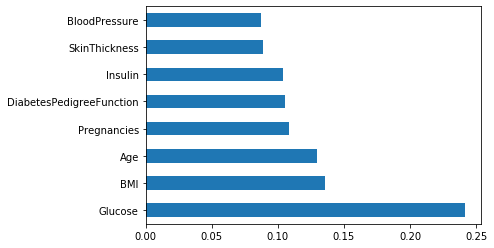

In [86]:
pd.Series(xgb_random.best_estimator_.feature_importances_, 
          index=diabetes.drop('Outcome',axis=1).columns).nlargest(100).plot(kind='barh')

In [42]:
pred_test_xgb = xgb_random.predict(test_X)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       101
           1       0.58      0.49      0.53        53

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



In [ ]:
diabetes.replace(0,np.nan,inplace=True)